# Projekat iz predmeta analiza socijalnih mreza


## Kvantitativna i kvalitativna Analiza stanja profesionalnog muškog tenisa u periodu od 2018. do 2020. godine

2020.godina Analiza

Ucitavanje podataka

In [1]:
import pandas as pd

dataPath = "data/atp_matches_2020.csv"

players_dataPath = "data/atp_players.csv"

player_atp_rankings_dataPath = "data/atp_rankings_current.csv"

data = pd.read_csv(dataPath) 
#print(data.columns)
print(data.isna().any())

#players
players_data = pd.read_csv(players_dataPath)
#print(players_data)

#atp ranking
players_atp_rank_data = pd.read_csv(player_atp_rankings_dataPath)
players_atp_rank_data.isna().any()
#points null moze biti
#print(players_atp_rank_data)

tourney_id            False
tourney_name          False
surface               False
draw_size             False
tourney_level         False
tourney_date          False
match_num             False
winner_id             False
winner_seed            True
winner_entry           True
winner_name           False
winner_hand            True
winner_ht              True
winner_ioc            False
winner_age             True
loser_id              False
loser_seed             True
loser_entry            True
loser_name            False
loser_hand             True
loser_ht               True
loser_ioc             False
loser_age              True
score                  True
best_of               False
round                 False
minutes                True
w_ace                  True
w_df                   True
w_svpt                 True
w_1stIn                True
w_1stWon               True
w_2ndWon               True
w_SvGms                True
w_bpSaved              True
w_bpFaced           

ranking_date    False
rank            False
player          False
points          False
dtype: bool

In [2]:
#provera da li je match_num kolona koja moze da bude uzeta za id

print(data['match_num'].isnull().values.any())
print(data['match_num'].is_unique)

False
False


In [3]:
#dodati automatski generisani id kao dodatnu kolonu
data['id'] = data.index
print(data)

#sacuvati u novi fajl
import pickle

with open("data/data2020_cleaned.csv", 'wb') as file:
    pickle.dump(data, file)

                            tourney_id                  tourney_name surface  \
0                            2020-8888                       Atp Cup    Hard   
1                            2020-8888                       Atp Cup    Hard   
2                            2020-8888                       Atp Cup    Hard   
3                            2020-8888                       Atp Cup    Hard   
4                            2020-8888                       Atp Cup    Hard   
...                                ...                           ...     ...   
1442  2020-M-DC-2020-WG2-PO-POL-HKG-01  Davis Cup WG2 PO: POL vs HKG    Hard   
1443  2020-M-DC-2020-WG2-PO-POL-HKG-01  Davis Cup WG2 PO: POL vs HKG    Hard   
1444  2020-M-DC-2020-WG2-PO-SYR-ZIM-01  Davis Cup WG2 PO: SYR vs ZIM    Hard   
1445  2020-M-DC-2020-WG2-PO-SYR-ZIM-01  Davis Cup WG2 PO: SYR vs ZIM    Hard   
1446  2020-M-DC-2020-WG2-PO-SYR-ZIM-01  Davis Cup WG2 PO: SYR vs ZIM    Hard   

      draw_size tourney_level  tourney_

In [4]:
import numpy as np

# Selekcija samo kolona 'match_num' i 'id' i grupisanje po match_num
data_grupisano = data[['match_num', 'id']].groupby('match_num')

# agg() radi agregaciju, u ovom slučaju po broju elemenata u grupi
data_agregirano = data_grupisano['id'].agg(np.size)
print(type(data_agregirano))
print(data_agregirano)

<class 'pandas.core.series.Series'>
match_num
1      34
2      34
4      32
5       9
100     3
       ..
296    29
297    29
298    29
299    30
300    29
Name: id, Length: 205, dtype: int64


In [5]:
data_nonunique = data_agregirano[data_agregirano>1]
print(data_nonunique)

match_num
1      34
2      34
4      32
5       9
100     3
       ..
296    29
297    29
298    29
299    30
300    29
Name: id, Length: 186, dtype: int64


In [6]:
#naci max i index max broja ponovljenih
trazeni = data_nonunique[data_nonunique == data_nonunique.max()]
print(trazeni)
target_match_num = trazeni.keys()[0]
print(target_match_num)

match_num
1    34
2    34
Name: id, dtype: int64
1


In [7]:
#ispisati sve meceve kao match_num imaju odredjeni max
data_target = data[data['match_num'] == target_match_num]
lista_labela = ['tourney_name', 'winner_id', 'loser_id', 'winner_rank', 'loser_rank']
print(data_target[lista_labela])

#ispisi sve ciji je ili winner_rank null ili loser_rank null
data_winOrlos_is_null = data_target[(data_target['winner_rank'].isnull()) | (data_target['loser_rank'].isnull())]
print(data_winOrlos_is_null)

#istraga o igracima ciji je winner_rank u tabeli matches_2020 null ili loser_rank u tabeli matches_2020 null
print(players_data['player_id'].equals(data_winOrlos_is_null['winner_id']))
players_info_rang_null = players_data.loc[(players_data['player_id'].isin(data_winOrlos_is_null['winner_id'])) | (players_data['player_id'].isin(data_winOrlos_is_null['loser_id']))]
print(players_data.loc[(players_data['player_id'].isin(data_winOrlos_is_null['winner_id'])) | (players_data['player_id'].isin(data_winOrlos_is_null['loser_id']))])

#postoje neki koji uopste nemaju upisanu ruku i datum rodjenja, datum rodjenja format double iako u opisu drugaciji format

                      tourney_name  winner_id  loser_id  winner_rank  \
1338  Davis Cup QLS R1: ARG vs COL     123755    104919        148.0   
1341  Davis Cup QLS R1: AUS vs BRA     111442    106329         63.0   
1344  Davis Cup QLS R1: AUT vs URU     110602    105899         85.0   
1347  Davis Cup QLS R1: BEL vs HUN     105074    105226        222.0   
1351  Davis Cup QLS R1: CRO vs IND     127339    105432        277.0   
1354  Davis Cup QLS R1: CZE vs SVK     106210    106075         64.0   
1357  Davis Cup QLS R1: GER vs BLR     105526    125802         34.0   
1361  Davis Cup QLS R1: JPN vs ECU     105877    104424        151.0   
1363  Davis Cup QLS R1: KAZ vs NED     104898    105062        169.0   
1366  Davis Cup QLS R1: SWE vs CHI     144707    144642         67.0   
1369  Davis Cup QLS R1: USA vs UZB     124187    104797         38.0   
1372  Davis Cup WG1 PO: BIH vs RSA     106000    105434        107.0   
1375  Davis Cup WG1 PO: BOL vs DOM     106198    105497         

In [8]:
#players_info_rang_null 
#players_atp_rank_data
columns_name_players_atp_rank = ['ranking_date', 'rank', 'player', 'points']
print(players_atp_rank_data[columns_name_players_atp_rank])
print(players_atp_rank_data[columns_name_players_atp_rank].groupby('player').mean())

       ranking_date  rank  player  points
0          20200106     1  104745    9985
1          20200106     2  104925    9055
2          20200106     3  103819    6590
3          20200106     4  106233    5825
4          20200106     5  106421    5705
...             ...   ...     ...     ...
51152      20201221   896  209857      15
51153      20201221   897  103565      15
51154      20201221   898  125800      15
51155      20201221   899  132575      15
51156      20201221   900  126630      15

[51157 rows x 4 columns]
        ranking_date         rank       points
player                                        
100644  2.020072e+07     7.000000  4457.115385
102093  2.020072e+07   898.423077    13.653846
103175  2.020072e+07   772.076923    21.000000
103220  2.020072e+07  1350.576923     3.000000
103333  2.020072e+07   133.000000   441.846154
...              ...          ...          ...
209918  2.020117e+07  1395.000000     2.666667
209928  2.020119e+07  1476.250000     2.000000


In [9]:
import networkx as nx

list_winner = set(data['winner_id'].apply(str).unique())
#print(list_winner)
list_loser = set(data['loser_id'].apply(str).unique())
#print(list_loser)

skup_id = list_winner.union(list_loser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

print(data.columns)

Postoji 345 različitih igrača
Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'id'],
      dtype='object')


In [10]:
#videti timestamp u tabeli 10s, iz koje je godine, i koji je datum
#proveriti za podatke za 2018, 2019 u fajlovima koji objasnjavaju meceve, neki mec posle tog datuma koji pise u 10s fajlu
print(players_atp_rank_data.columns)
print(players_atp_rank_data['player'].is_unique)
#players_atp_rank_data.dtypes
maska_active_players = players_atp_rank_data['player'].isin(skup_id) & (players_atp_rank_data['ranking_date']<=20201231) & (players_atp_rank_data['ranking_date']>=20200101)
players_rank_2020 = players_atp_rank_data[maska_active_players]
players_rank_2020 = players_rank_2020.drop_duplicates()

max_players_rank_2020 = players_rank_2020.groupby('player').max()
#print(players_rank_2020[['ranking_date', 'rank', 'player', 'points']].groupby('player').agg({'ranking_date': 'max'}))
#print(players_rank_2020.sort_values('ranking_date').groupby('player').tail(1))
#print(max_players_rank_2020['player'].is_unique)

player_sorted_date_rank_2020 = players_rank_2020.sort_values(['ranking_date'],ascending=False).groupby('player').head(1)
#player_sorted_date_rank_2020 = player_sorted_date_rank_2020['points'].map(str)
#player_sorted_date_rank_2020 = player_sorted_date_rank_2020['rank'].map(str)
print(player_sorted_date_rank_2020.dtypes)
print(players_rank_2020.sort_values(['ranking_date'],ascending=False).groupby('player').head(1))


Index(['ranking_date', 'rank', 'player', 'points'], dtype='object')
False
ranking_date    int64
rank            int64
player          int64
points          int64
dtype: object
       ranking_date  rank  player  points
51153      20201221   897  103565      15
49408      20201221  1051  132374       9
49256      20201221    99  105870     728
49257      20201221   100  126149     725
49306      20201221   949  208055      13
...             ...   ...     ...     ...
50457      20201221   201  104678     323
50458      20201221   202  104660     322
50459      20201221   203  111460     310
29446      20201012   989  111797      10
1795       20200106   769  104907      20

[309 rows x 4 columns]


In [11]:
#provera da li je stvarno poslednji rang 2020-te godine
#print(players_rank_2020[players_rank_2020['player']==103565].sort_values('ranking_date', ascending=False))

#provera da li su svi elementi iz skup_id prisuni u tabeli player_sorted_date_rank_2020
difference_set = set(map(int, skup_id)).difference(set(player_sorted_date_rank_2020['player']))
print(len(difference_set))

maska_diff_nodes_winner = data['winner_id'].isin(difference_set) 
maska_diff_nodes_loser =  data['loser_id'].isin(difference_set)
active_columns_winner = ['winner_id', 'winner_name', 'winner_rank', 'winner_rank_points']
active_columns_loser = ['loser_id', 'loser_name', 'loser_rank', 'loser_rank_points']
winner_miss_data = data[active_columns_winner][maska_diff_nodes_winner]
print(f"Broj nedefinisanih u pobednicima: {len(winner_miss_data)}")
print(winner_miss_data)
loser_miss_data = data[active_columns_loser][maska_diff_nodes_loser]
loser_miss_data.rename(columns = {'loser_id':'winner_id', 'loser_name':'winner_name', 'loser_rank':'winner_rank', 'loser_rank_points':'winner_rank_points'}, inplace = True)
#loser_miss_data.rename_axis({'winner_id', 'winner_name', 'winner_rank', 'winner_rank_points'}, axis="columns")
#loser_miss_data.to_replace(to_replace = active_columns_loser, value = active_columns_winner, inplace=True)
print(f"Broj nedefinisanih u gubitnicima: {len(loser_miss_data)}")
print(loser_miss_data)
#missed_data=loser_miss_data.append(winner_miss_data).drop_duplicates()
#missed_data.rename(columns = {'winner_id' : 'player', 'winner_rank' : 'rank', 'winner_rank_points' : 'points'}, inplace=True)
#print(f"Broj nedefinisanih u gubitnicima: {missed_data}")


36
Broj nedefinisanih u pobednicima: 11
      winner_id                        winner_name  winner_rank  \
1391     103529               Aisam Ul Haq Qureshi          NaN   
1392     103499                         Aqeel Khan          NaN   
1404     105334                Luis David Martinez          NaN   
1412     104233                   Frederik Nielsen          NaN   
1424     105464                Christopher Rungkat          NaN   
1426     209870              Gunawan Trismuwantara          NaN   
1434     209226              Adolfo Daniel Vallejo          NaN   
1435     209225  Martin Antonio Vergara Del Puerto          NaN   
1436     209226              Adolfo Daniel Vallejo          NaN   
1443     209874                   Maks Kasnikowski          NaN   
1444     208518                          Hazem Naw          NaN   

      winner_rank_points  
1391                 NaN  
1392                 NaN  
1404                 NaN  
1412                 NaN  
1424                

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sys

data_reduced = data[['winner_id', 'winner_name', 'winner_ioc', 'loser_id', 'loser_name', 'loser_ioc', 'id']]


G = nx.Graph() # pravi praznu mrežu
G.add_nodes_from(skup_id) # dodaje čvorove čije su labele u "skup_id"

for _, winner_id, winner_name, winner_ioc, loser_id, loser_name, loser_ioc, _ in data_reduced.itertuples():
    winner_id_string = str(winner_id)
    loser_id_string = str(loser_id)
    if (winner_id_string, loser_id_string) in G.edges:
        G.edges[winner_id_string, loser_id_string]['weight'] += 1
    else:
        G.add_edge(winner_id_string, loser_id_string, weight=1)
        
        winner = player_sorted_date_rank_2020[player_sorted_date_rank_2020['player'] == int(winner_id)]
        
        if winner.empty:
            winner_rank = str(sys.maxsize)
            winner_points = str(0)
        else:
            winner_rank = str(winner['rank'].values[0])
            winner_points = str(winner['points'].values[0])
        
        loser = player_sorted_date_rank_2020[player_sorted_date_rank_2020['player'] == int(loser_id)]
        
        if loser.empty:
            loser_rank = str(sys.maxsize)
            loser_points = str(0)
        else:
            loser_rank = str(loser['rank'].values[0])
            loser_points = str(loser['points'].values[0])
        winner_attrs = {winner_id_string: {'name': winner_name, 'country': winner_ioc, 'rank': winner_rank, 'points': winner_points}}
        loser_attrs = {loser_id_string: {'name': loser_name, 'country': loser_ioc, 'rank': loser_rank, 'points': loser_points}}
        nx.set_node_attributes(G, winner_attrs)
        nx.set_node_attributes(G, loser_attrs)




In [13]:
print(data.dtypes)
#print(G.edges.data("weight"))
print(nx.get_node_attributes(G, "name"))
print(nx.get_node_attributes(G, "country"))
print(nx.get_node_attributes(G, "points"))

output_path = "models/undirected_graph_2020.gml"

nx.write_gml(G, output_path)


tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed            object
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed             object
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

1.pitanje Koliki je prosecan broj tenisera(saigraca) po svakom teniseru? 
gephi->ucitala graf, Statistics -> Network Overview -> Average Degree

<img src="img/1.pitanje_average_degree" width=500 height=500 />

In [14]:
#2.pitanje Koji teniseri su se susretali sa najvecim brojem drugih tenisera
my_degrees = dict(G.degree()) #dictionary key:value
degree_values = [v for k, v in G.degree()]

print(max(my_degrees.items(), key= lambda x: x[1])) #max u tom dict 

print(nx.get_node_attributes(G, 'name')['126094']) #atribut name za cvor ciji je index rezultat prethodnog upita

('126094', 43)
Andrey Rublev


In [15]:
#3.pitanje Koji teniseri su ucestvovali na najvecem broju (razlicih) turnira?
winner_tourney_columns = ['winner_id', 'tourney_id']
loser_tourney_columns = ['loser_id', 'tourney_id']

dataWinner_tourney = data[winner_tourney_columns].drop_duplicates()
dataWinner_tourney = dataWinner_tourney.rename(columns = {'winner_id': 'player_id'})
print(dataWinner_tourney)

dataLoser_tourney = data[loser_tourney_columns].drop_duplicates()
dataLoser_tourney = dataLoser_tourney.rename(columns = {'loser_id': 'player_id'})
print(dataLoser_tourney)

#unija pobednika i gubitnika sa preimenovanom kolonom player_id, zbog konkatenacije
dataWinnerAndLoserUnion = pd.concat([dataWinner_tourney, dataLoser_tourney], ignore_index=True)
print(dataWinnerAndLoserUnion)

#izbaci duplikate
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.drop_duplicates()
print(dataWinnerAndLoserUnion)

#grupisi po player_id pa izdvoj po sumi
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.groupby('player_id').count()
print(dataWinnerAndLoserUnion)


print(nx.get_node_attributes(G, 'name')['100644'])
print(nx.get_node_attributes(G, 'name')['103333'])

#proveri presek, datawinner.drop_duplicates, dataloser.drop_dupicates pa onda preimenuj kolone u id, unija pa onda drop_duplicates, pa group_by pa count pa onda uzmes resenje


      player_id                        tourney_id
0        104925                         2020-8888
1        105138                         2020-8888
3        105583                         2020-8888
4        104745                         2020-8888
8        106421                         2020-8888
...         ...                               ...
1441     200390  2020-M-DC-2020-WG2-PO-POL-HKG-01
1442     105668  2020-M-DC-2020-WG2-PO-POL-HKG-01
1443     209874  2020-M-DC-2020-WG2-PO-POL-HKG-01
1444     208518  2020-M-DC-2020-WG2-PO-SYR-ZIM-01
1445     111761  2020-M-DC-2020-WG2-PO-SYR-ZIM-01

[779 rows x 2 columns]
      player_id                        tourney_id
0        104745                         2020-8888
1        105583                         2020-8888
2        106421                         2020-8888
3        111575                         2020-8888
4        200282                         2020-8888
...         ...                               ...
1442     106388  2020-M-DC

In [16]:
#4.pitanje Koji teniseri su dobri kandidati za predstavnike profesionalnih tenisera? Da li se i sta se menja ukoliko se umesto jednog bira skup od nekoliko predstavnika? Dobar predstavnik ili predstavnici bi trebalo da budu u kontaktu sa sto vecim skupom tenisera

#proveriti ovaj 2.deo na sta se odnosi????
#mere centralnosti koristim Degree centrality, vise u kontaktu sa drugim teniserima teze da budu predstavnici
import operator
dictionary = dict(nx.degree_centrality(G))
print(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:5])

[('126094', 0.125), ('200000', 0.10755813953488372), ('126774', 0.09883720930232558), ('104925', 0.09302325581395349), ('111575', 0.09011627906976744)]


In [17]:
print(nx.get_node_attributes(G, 'name')['126094'])
print(nx.get_node_attributes(G, 'name')['200000'])
print(nx.get_node_attributes(G, 'name')['126774'])
print(nx.get_node_attributes(G, 'name')['104925'])
print(nx.get_node_attributes(G, 'name')['134770'])

Andrey Rublev
Felix Auger Aliassime
Stefanos Tsitsipas
Novak Djokovic
Casper Ruud


5) Kako su rangirani na ATP listi teniseri koji su se susretali sa najvećim brojem drugih tenisera?

Rang prvih 10 tenisera koji su se susreli sa najvecim brojem drugih tenisera.

In [18]:
sorted_dict =dict(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:40]) 
for key in sorted_dict:
    print(nx.get_node_attributes(G, 'name')[key], nx.get_node_attributes(G, 'rank')[key], nx.get_node_attributes(G, 'country')[key])
    


Andrey Rublev 8 RUS
Felix Auger Aliassime 21 CAN
Stefanos Tsitsipas 6 GRE
Novak Djokovic 1 SRB
Karen Khachanov 20 RUS
Casper Ruud 27 NOR
Daniil Medvedev 4 RUS
Diego Schwartzman 9 ARG
Alexander Zverev 7 GER
Rafael Nadal 2 ESP
Ugo Humbert 30 FRA
Christian Garin 22 CHI
Milos Raonic 14 CAN
John Millman 38 AUS
Denis Shapovalov 12 CAN
Alexander Bublik 50 KAZ
Tommy Paul 54 USA
Dusan Lajovic 26 SRB
Jannik Sinner 37 ITA
Roberto Bautista Agut 13 ESP
Adrian Mannarino 35 FRA
Taylor Fritz 29 USA
Pablo Carreno Busta 16 ESP
Hubert Hurkacz 34 POL
Dominic Thiem 3 AUT
Miomir Kecmanovic 44 SRB
Borna Coric 24 CRO
Jan Lennard Struff 36 GER
Daniel Evans 32 GBR
Yoshihito Nishioka 56 JPN
Filip Krajinovic 31 SRB
Marin Cilic 42 CRO
Albert Ramos 46 ESP
Vasek Pospisil 61 CAN
Lorenzo Sonego 33 ITA
Marton Fucsovics 55 HUN
Gilles Simon 63 FRA
Lloyd Harris 87 RSA
Stan Wawrinka 18 SUI
Benoit Paire 28 FRA


6) Iz kojih zemalja dolazi najveći broj aktivnih igrača u proteklom periodu?

Prvo kreiramo masku koja ce da selektuje sve igrace koji su u skupu igraca koji su igrali mec u 2020
Potom dobijen rezultat grupisemo po drzavi i sortiramo zatim
Najaktivniji su iz SAD, Francuske, Spanije, Italije, Nemacke, 
Srbija na 8 mestu sa  Kanadom sa 8 aktivnih igraca

In [19]:
maska_active_players = players_data['player_id'].isin(skup_id) 
active_players_2020 = players_data[maska_active_players]
data_grupisano = active_players_2020[['player_id', 'country_code']].groupby('country_code')
data_agregirano = data_grupisano['country_code'].agg(np.size)

print(data_agregirano.sort_values(ascending=False).head(20))

country_code
USA    28
FRA    22
ITA    18
GER    15
AUS    14
ESP    14
ARG    13
RUS     9
CAN     8
SRB     8
JPN     7
SUI     6
BEL     5
POL     5
GBR     5
IND     5
CRO     5
SVK     5
TPE     4
BUL     4
Name: country_code, dtype: int64


7) Iz kojih zemalja dolaze najuspešniji igrači u smislu osvojenih poena na ATP listi?

Najuspesniji igraci u 2020 su iz Srbije, Spanije, Svajcarske, Nemacke, Argentine..

U prvih 30 najvise ima tenisera iz Spanije, Francuske, Kanade i Rusije, Srbija se nalazi na 2 mestu po broju tenisera u prvih 30


In [20]:
sorted_success_players = player_sorted_date_rank_2020.sort_values('points',ascending=False).head(30)
data_needed_columns = data[['winner_id', 'winner_ioc', 'winner_name']].drop_duplicates();


merged_inner_data_players = pd.merge(left=sorted_success_players, right=data_needed_columns, left_on='player', right_on='winner_id')
print("Prvih 30 tenisera na svetu su dati u sledecoj listi")
print(merged_inner_data_players[['winner_ioc', 'winner_name', 'points']])

data_grupisano = merged_inner_data_players[['winner_id', 'winner_ioc']].groupby('winner_ioc')
data_agregirano = data_grupisano['winner_ioc'].agg(np.size)

print("Grupisani po drzavama iz kojih dolaze imamo sledeci skup:")
print(data_agregirano.sort_values(ascending=False).head(30))

Prvih 30 tenisera na svetu su dati u sledecoj listi
   winner_ioc            winner_name  points
0         SRB         Novak Djokovic   12030
1         ESP           Rafael Nadal    9850
2         AUT          Dominic Thiem    9125
3         RUS        Daniil Medvedev    8470
4         SUI          Roger Federer    6630
5         GRE     Stefanos Tsitsipas    5925
6         GER       Alexander Zverev    5525
7         RUS          Andrey Rublev    4119
8         ARG      Diego Schwartzman    3455
9         ITA      Matteo Berrettini    3075
10        FRA           Gael Monfils    2860
11        CAN       Denis Shapovalov    2830
12        ESP  Roberto Bautista Agut    2710
13        CAN           Milos Raonic    2580
14        BEL           David Goffin    2555
15        ESP    Pablo Carreno Busta    2535
16        ITA          Fabio Fognini    2400
17        SUI          Stan Wawrinka    2320
18        BUL        Grigor Dimitrov    2260
19        RUS        Karen Khachanov    2245
20 

Analiza komuna

U realnim mrezama mogu se uociti gusce povezani delovi mreze, odredjeni broj aktera bolje povezani nego sa ostalim clanovima mreze -> grupe ili zajednica. Mogu biti odvojene ili delimicno se preklapati.

Modularnost je mera kvaliteta particionisanja cvorova mreze u odgovarajuce klastere.


1. primenicemo metriku modularnosti i analizu u Gephi alatu da bismo analizirali izdvojene komune/klastere i prikazali ih
2. implementiracemo top-down pristup -> Girvan-Newman metod

Gephi alat i analiza izdvojenih komuna primenom analize modularnosti


<img src="img/modularity_analysis.png" width=1000 height=1000 />

Po opadajucim vrednostima 5 komuna sa najvecom modularnoscu: 

<img src="img/top5ValueModularityClass.png" width=1000 height=1000 />

Uoceno je da mreze sa vecom modularnoscu podeljene na klastere koji su, unutar sebe, gusto povezani. Ovakve mreze po definiciji, ali i sto se da videti sa prilozenih slika, nemaju veliki broj veza sa ostatkom mreze.

In [21]:
#Girvan-Newman method
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(G)
cnt = 0
for community in next(communities):
    cnt = cnt + 1
    print("Community " + str(cnt) + ":")
    print(list(community))
    for node in community:
        print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
        
        
#ovaj algoritam je razorni
#4 osnovna koraka: 1. racunanje centralnosti svake grane u skupu grana mreze (edge betweenness) 2. uklanjanje grane koja ima najvecu centralnost 3.ponovo racunanje centralnosti grana u novom modifikovanom grafu dobijenom u prethodnom koraku #iterativno dokle god postoje grane u tekucem grafu
#mera kvaliteta podele u odnosu na prazan null model grafa (graf sa slucajnim rasporedom ne sadrzi komune)
#poredjenje gustine grana u komuni sa gustinom grana u podgrafu istih cvorova u praznom modelu dobija se odstupanje strukture komune od slucajnog rasporeda grana

Community 1:
['111459', '200390', '206909', '111513', '106210', '105173', '111576', '105643', '200335', '104327', '105948', '200303', '200611', '104527', '105413', '105902', '103565', '104655', '104665', '106150', '106099', '104312', '145016', '127339', '105916', '200670', '126555', '105932', '126128', '126504', '106109', '105376', '132374', '144642', '108739', '111505', '104755', '134868', '105023', '144932', '200384', '202358', '111575', '105155', '111456', '106071', '200000', '105583', '144719', '106281', '106296', '105614', '122330', '144817', '207680', '208108', '207608', '105053', '105449', '126156', '111815', '104678', '126964', '106415', '205695', '105943', '206748', '126535', '105379', '105732', '111790', '136440', '106426', '104229', '132932', '105841', '105992', '126120', '105550', '126663', '105633', '126205', '106408', '124187', '126190', '111515', '109739', '111797', '104797', '202090', '200005', '111460', '106058', '104542', '120424', '104586', '105477', '106218', '10572

10. Sprovesti analizu klasterisanja i asortativnu analizu, pa uporediti grupisanje na osnovu zemlje iz koje igrači dolaze, na osnovu broja mečeva koje igraju i na osnovu rejtinga


Lokalni koeficijent klasterizacije se računa kao gustina mreže koju čine posmatrani čvor, njegovi susedi i njihove međusobne veze

Stepen klasterizacije kompletne mreže se računa na osnovu proseka pojedinačnih čvorova


Globalni koeficijent klasterizacije (alternativa)- Posmatra zatvorene trijade unutar mreze u odnosu na sve moguće povezane trijade

In [22]:
player_id, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nenula = [(id_ig, cc)  for id_ig, cc in zip(player_id, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)
print(nx.get_node_attributes(G, 'name')['104229'])
print(len(nx.triangles(G).items()))
newDict = dict(filter(lambda elem: elem[1] > 0,nx.triangles(G).items()))
print(len(newDict))
v=list(newDict.values())
k=list(newDict.keys())
print(k[v.index(max(v))]) 

transitivity = nx.transitivity(G)
print(f"Tranzitivnost {transitivity}")

Max lokalni cc: 0.33333333333333337
Prosečan cc: 0.09086792378213675
Lokalni stepeni klasterisanja koji nisu nula:
         id        cc
92   106198  0.006061
137  105575  0.011057
5    105155  0.011905
109  124079  0.022059
155  200615  0.022222
..      ...       ...
113  104327  0.333333
103  126612  0.333333
126  208364  0.333333
46   111460  0.333333
122  104229  0.333333

[158 rows x 2 columns]
Yen Hsun Lu
345
158
126094
Tranzitivnost 0.14937486290853258


{('104792', '104229'): Text(0.2500000372529033, -0.43301270835610933, '1'),
 ('104792', '106034'): Text(0.24999996274709668, 0.43301271829021687, '1'),
 ('106034', '104229'): Text(-0.5, -9.934107536579972e-09, '1')}

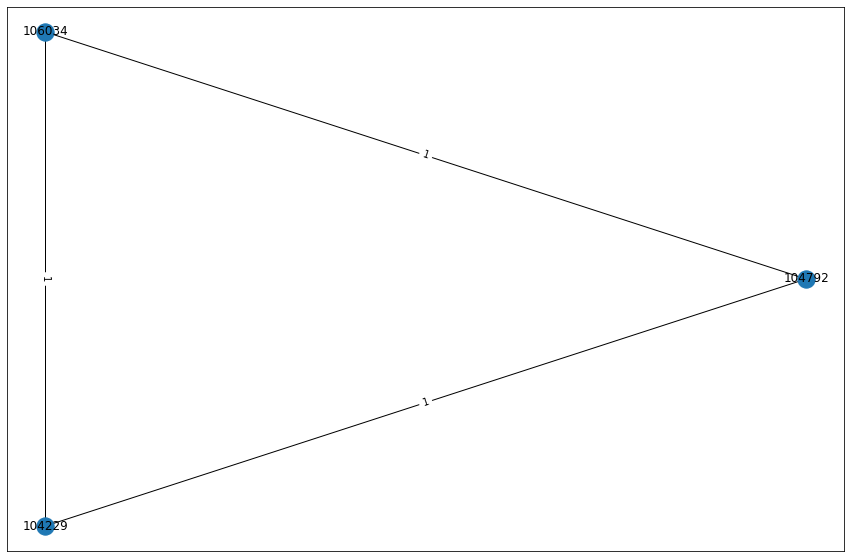

In [23]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, '104229')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Asortativnost:
Homofilija - tendencija ljudi da stvaraju veze sa sebi slicnim ljudima
U analizi socijalnih mreze homofilija u formi asortativnosti - cvorovi imaju tendenciju da se povezuju sa cvorovima slicnog stepena

In [24]:
# asortativnost na osnovu netežinskog stepena čvora
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

# asortativnost na osnovu drzave
r3 = nx.attribute_assortativity_coefficient(G, 'country')
print(f"Koeficijent asortativnosti na osnovu drzave: {r3}")

# asortativnost na osnovu ranga
r4 = nx.attribute_assortativity_coefficient(G, 'rank')
print(f"Koeficijent asortativnosti na osnovu ranga: {r4}")


Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.23815555973416275
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.23637924173286778
Koeficijent asortativnosti na osnovu drzave: 0.0066677316949747024
Koeficijent asortativnosti na osnovu ranga: -0.003351964280899541


11)U kojoj meri teniseri imaju tendenciju da se susreću sa istim teniserima? Da li na to utiče njihovo rangiranje na ATP listi?

In [25]:
player_tendency_factors = {}
for player_id in G:
    if G.degree(player_id) != 0:
        player_tendency_factors[player_id] = G.degree(player_id, weight='weight') / G.degree(player_id)
    else:
        player_tendency_factors[player_id] = 0

avg_player_tendency_factor = sum(degreeview[1] for degreeview in G.degree(weight='weight')) / sum(degreeview[1] for degreeview in G.degree())


# effect on ranking
ranks = nx.get_node_attributes(G, 'rank')
data_final = []
for player_id in G:
    data_final.append((player_id, nx.get_node_attributes(G, 'name')[player_id], player_tendency_factors[player_id], ranks[player_id]))
df = pd.DataFrame(data_final, columns=['player_id', 'full_name', 'player_tendency_factors', 'rank'])
df.sort_values(by='player_tendency_factors', ascending=False, inplace=True)


In [26]:
print("Prosecan odnos tezinskih u odnosu na netezinske grane u celom grafu: " + str(avg_player_tendency_factor))
df.head(n=10)


Prosecan odnos tezinskih u odnosu na netezinske grane u celom grafu: 1.0920754716981131


,player_id,full_name,player_tendency_factors,rank
344,104925,Novak Djokovic,1.437500,1
216,106043,Diego Schwartzman,1.366667,9
104,100644,Alexander Zverev,1.344828,7
219,106233,Dominic Thiem,1.307692,3
28,104269,Fernando Verdasco,1.300000,65
318,126774,Stefanos Tsitsipas,1.294118,6
221,105777,Grigor Dimitrov,1.285714,19
308,126207,Frances Tiafoe,1.266667,59
112,106421,Daniil Medvedev,1.266667,4
57,106228,Juan Ignacio Londero,1.266667,79


In [27]:
#12 Koji teniseri predstavljaju jezgro mreze?
core_number = nx.core_number(G)
print(core_number)#dict

max_core_number = max(core_number.values()) #max value u dict
print(max_core_number)

core = nx.k_core(G, max_core_number)
for player_id in core:
    print(player_id)
    print(nx.get_node_attributes(G, 'name')[player_id])

{'111576': 4, '104527': 10, '134886': 1, '105916': 10, '105376': 3, '111505': 1, '104755': 10, '200384': 5, '105155': 4, '106071': 1, '106296': 7, '105614': 1, '126156': 3, '209872': 1, '104678': 4, '111790': 1, '105841': 3, '126120': 1, '126190': 1, '200574': 1, '124187': 10, '202261': 1, '111797': 3, '104797': 3, '200005': 10, '120424': 1, '104586': 2, '106075': 5, '104269': 7, '200221': 10, '124116': 2, '105332': 10, '106220': 3, '106232': 1, '104898': 3, '122669': 3, '126204': 1, '123795': 1, '207989': 2, '106214': 4, '126610': 9, '106378': 10, '200624': 6, '105899': 2, '200265': 1, '106432': 10, '200247': 1, '106293': 4, '106393': 1, '206716': 1, '104660': 2, '126127': 4, '105138': 10, '123755': 6, '200514': 5, '209867': 1, '133430': 10, '106228': 9, '209870': 1, '103893': 4, '105539': 5, '105216': 7, '105464': 1, '105526': 10, '205734': 7, '207830': 1, '208055': 1, '105985': 1, '105406': 2, '106148': 9, '209119': 1, '103333': 4, '111513': 10, '105173': 10, '200611': 2, '145016': 

In [28]:
#13 Ko su teniseri koji povezuju razlicite grupe u okviru mreze -> pronalazimo bridgeve u ovkviru mreze grane koje povezuju razlicite grupe u okviru mreze
bridges = nx.bridges(G)
list(bridges)

[('111576', '105614'),
 ('134886', '209226'),
 ('105376', '111153'),
 ('111505', '105936'),
 ('200384', '126125'),
 ('105155', '207680'),
 ('105155', '105827'),
 ('106071', '105649'),
 ('209872', '209226'),
 ('111790', '136440'),
 ('126120', '124187'),
 ('126190', '105967'),
 ('200574', '209869'),
 ('202261', '126204'),
 ('202261', '105688'),
 ('200005', '111578'),
 ('200005', '200303'),
 ('120424', '105432'),
 ('106220', '145016'),
 ('106220', '132374'),
 ('106232', '105156'),
 ('106232', '106198'),
 ('122669', '105757'),
 ('126204', '106218'),
 ('126204', '105349'),
 ('123795', '127326'),
 ('126610', '106302'),
 ('200265', '106426'),
 ('200247', '132374'),
 ('106393', '105827'),
 ('206716', '209868'),
 ('209867', '136440'),
 ('106228', '105053'),
 ('209870', '206199'),
 ('105216', '105341'),
 ('105464', '207401'),
 ('207830', '126203'),
 ('208055', '105334'),
 ('105985', '126340'),
 ('209119', '144775'),
 ('111513', '202103'),
 ('106109', '103565'),
 ('106281', '106210'),
 ('111815',

14. Kolika je gustina svake od modelovanih mreza? 
Gustina mreza moze se odrediti iz Gephi alata (Statistics -> Graph density) 
Racuna se za neusmerene grafove kao d = (2m)/n(n-1)
m -> broj grana
n -> broj cvorova

Rezultat:
<img src="img/graph_density.png" width=1000 height=1000 />

In [29]:
#koristeci python i networkx
density = nx.density(G)
print(f"Gustina mreze koristeci biblioteku network x je: {density}")


Gustina mreze koristeci biblioteku network x je: 0.022328951803168184


In [30]:
#15 U kojoj mrezi povezane i centralizovane mreze
#izracunacemo degree_centrality, closeness_centrality, information_centrality, betweenes_centrality i opisacemo znacenje tih vrednosti
DC = nx.degree_centrality(G)
import operator
dc_items = sorted(DC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(dc_items)
for dc_item in dc_items:
    node = dc_item[0]
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node], G.degree[node])
#vazni cvorovi imaju veliki broj konekcija; broj direktnih suseda svakog cvora u mrezi
#akteri u mrezi sa vecim brojem relacija manje zavisni u odnosu na druge aktere

CC = nx.closeness_centrality(G)
cc_items = sorted(CC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(cc_items)
for cc_item in cc_items:
    node = cc_item[0];
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
#vazni cvorovi su blizi drugim cvorovima, vazniji cvorovi centralniji polozaj u mrezi

BC = nx.betweenness_centrality(G)
bc_items = sorted(BC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(bc_items)
for bc_item in bc_items:
    node = bc_item[0];
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
#vazni cvorovi povezuju druge cvorove, mostovi posrednici izmedju ostalih cvorova u mrezi
#vazni cvorovi se nalaze na vecem broju najkracih putanja

#check if graph is connected
print(nx.is_connected(G))

#graf nije povezan ne moze se izracunati information_centrality
#nije povezan postoji grupa ljudi koji nisu igrali jedni sa drugima -> ne postoji protok informacija

[('126094', 0.125), ('200000', 0.10755813953488372), ('126774', 0.09883720930232558), ('104925', 0.09302325581395349), ('111575', 0.09011627906976744)]
Andrey Rublev 8 RUS 43
Felix Auger Aliassime 21 CAN 37
Stefanos Tsitsipas 6 GRE 34
Novak Djokovic 1 SRB 32
Karen Khachanov 20 RUS 31
[('126094', 0.37152979651162793), ('104925', 0.36191639234009415), ('200000', 0.35972627801428425), ('126774', 0.3538379014396456), ('134770', 0.35331213932755107)]
Andrey Rublev 8 RUS
Novak Djokovic 1 SRB
Felix Auger Aliassime 21 CAN
Stefanos Tsitsipas 6 GRE
Casper Ruud 27 NOR
[('104925', 0.03280214659767986), ('106218', 0.03277301474842045), ('126774', 0.03138019094292986), ('134770', 0.028838521775345027), ('126094', 0.02770884612626268)]
Novak Djokovic 1 SRB
Marcos Giron 73 USA
Stefanos Tsitsipas 6 GRE
Casper Ruud 27 NOR
Andrey Rublev 8 RUS
False


#habovi su vezani za degree_centrality i susedima onim sa najvecim vrednostima ove metrike iscrtati u gephiju videti TODO

16. Koje su prosecne distance, a koliki dijametar u okviru modelovanih mreza? 
Average Path length: 3.1371012285965936
Diameter: 11

In [31]:
#17. Kakva je distribucija cvorova po stepenu i da li prati neku zakonomernost? Kako je stepen cvora korelisan sa rejtingom tenisera? 
from collections import Counter
from operator import itemgetter

def plot_deg_frequency(G, weighted=False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({1: 119, 2: 45, 3: 22, 4: 15, 6: 13, 5: 13, 20: 9, 8: 8, 17: 7, 10: 7, 26: 7, 21: 6, 7: 6, 14: 6, 19: 5, 27: 5, 15: 5, 13: 5, 11: 4, 28: 4, 23: 4, 16: 4, 22: 3, 18: 3, 25: 3, 12: 3, 9: 2, 24: 2, 29: 2, 30: 2, 31: 2, 37: 1, 43: 1, 34: 1, 32: 1})


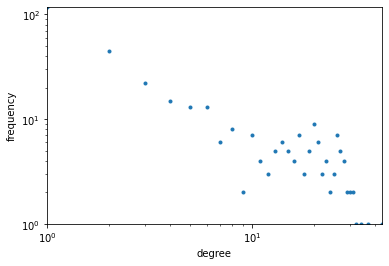

In [32]:
plot_deg_frequency(G)

#raspodela stepena čvora pokazuje da veliki broj čvorova ima stepen 1, odnosno da su igrali samo jedan meč. Sa druge strane, postoji mali broj čvorova sa većim stepenom. 

#ovakvi cvorovi prate power-law (scale-free) raspodelu

Counter({1: 119, 2: 45, 3: 22, 4: 15, 6: 13, 5: 12, 23: 8, 20: 7, 7: 7, 8: 6, 15: 6, 28: 6, 14: 6, 10: 5, 30: 5, 22: 5, 31: 5, 21: 5, 12: 4, 19: 4, 9: 4, 16: 4, 13: 3, 26: 3, 18: 3, 17: 3, 11: 3, 32: 2, 27: 2, 34: 2, 25: 1, 39: 1, 38: 1, 42: 1, 51: 1, 41: 1, 33: 1, 35: 1, 44: 1, 29: 1, 46: 1})


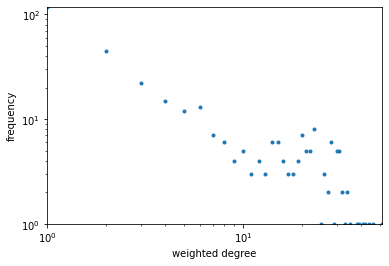

In [33]:
#graf je tezinski trebalo bi i ispitati i raspodelu po stepenu tezinskog grafa
plot_deg_frequency(G, weighted = True)

In [34]:
#kako je stepen cvora korelisan sa rejtingom tenisera
#izracunati stepen cvora i u svakom cvoru cuvamo rang sortirati tu listu po opadajucoj vrednosti ranga i ispisati zakljucke
for node in G.nodes:
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node], G.degree[node])
    
    
#veci rang veci stepen cvora; Igraci sa vecim rangom imaju veci stepen cvora

Sumit Nagal 136 IND 6
Stan Wawrinka 18 SUI 21
Sharmal Dissanayake 9223372036854775807 SRI 1
Marton Fucsovics 55 HUN 22
Peter Gojowczyk 145 GER 4
Enzo Couacaud 211 FRA 1
Richard Gasquet 47 FRA 17
Hugo Gaston 162 FRA 6
Pedro Sousa 105 POR 8
Bernard Tomic 226 AUS 1
Gregoire Barrere 109 FRA 11
Bradley Klahn 149 USA 1
Antoine Hoang 121 FRA 3
Thehan Sanjaya Wijemanne 9223372036854775807 SRI 1
Viktor Troicki 201 SRB 4
Brayden Schnur 208 CAN 1
Lorenzo Giustino 152 ITA 3
Nino Serdarusic 293 CRO 1
Nicolas Alvarez 345 PER 1
Alexander Donski 592 CAN 1
Reilly Opelka 39 USA 19
Otto Virtanen 610 FIN 2
Nicolas Jarry 989 CHI 3
Denis Istomin 184 UZB 3
Ugo Humbert 30 FRA 28
Yannick Maden 173 GER 1
Lukas Rosol 199 CZE 2
Jozef Kovalik 131 SVK 7
Fernando Verdasco 65 ESP 10
Alejandro Davidovich Fokina 52 ESP 19
Sebastian Ofner 159 AUT 2
Benoit Paire 28 FRA 21
Dimitar Kuzmanov 295 BUL 6
Roberto Cid 228 DOM 2
Robin Haase 197 NED 3
Juan Pablo Varillas 158 PER 4
Gerardo Lopez Villasenor 549 MEX 3
Altug Celikbile

Dennis Novak 96 AUT 17
Noah Rubin 250 USA 2
Milos Raonic 14 CAN 28
Ricardas Berankis 69 LTU 13
Taro Daniel 117 JPN 5
Frances Tiafoe 59 USA 15
Lorenzo Sonego 33 ITA 23
Ernesto Escobedo 198 USA 2
Julius Tverijonas 830 LTU 1
Feliciano Lopez 64 ESP 16
Casper Ruud 27 NOR 31
Yasutaka Uchiyama 104 JPN 8
Martin Klizan 151 SVK 2
Michail Pervolarakis 456 CYP 3
Martin Antonio Vergara Del Puerto 9223372036854775807 PAR 1
Stefanos Tsitsipas 6 GRE 34
Attila Balazs 92 HUN 12
Wilfredo Gonzalez 1123 GUA 2
Miomir Kecmanovic 44 SRB 26
Christopher O'Connell 120 AUS 3
Michael Mmoh 174 USA 6
Lamine Ouahab 648 ALG 1
Maks Kasnikowski 9223372036854775807 POL 1
Eric Jr. Olivarez 9223372036854775807 PHI 1
Lloyd Harris 87 RSA 22
Yannick Hanfmann 99 GER 10
Malek Jaziri 249 TUN 4
Cem Ilkel 219 TUR 4
Ruben Bemelmans 227 BEL 2
Stefano Travaglia 74 ITA 15
Marco Cecchinato 80 ITA 19
Frederik Nielsen 9223372036854775807 DEN 1
Daniel Evans 32 GBR 25
Steven Diez 179 CAN 1
Aisam Ul Haq Qureshi 9223372036854775807 PAK 1
Cor

18. Da li u mrezi postoje habovi i koji su?
Hubovi predstavljaju najvaznije cvorove. Referenca pitanje 15 i razlicitim izracunatim centralnostima, samo treba ocitati koji su to teniseri

In [35]:
#19. Da li mreza iskazuje osobine malog sveta?

#Mreza nije povezana, pa se ne moze izracunati prosecna udaljenost cvorova, vec je moguce naci najvecu povezanu komponentu pa analizirati nju na osnovu prosecne udaljenosti cvorova koja je izracunata i prema koeficijentu klasterizacije izracunatim za tu najvecu komponentu

print(nx.number_connected_components(G))
largest_connected_component = max(nx.connected_components(G), key=len) #vraca set cvorova
print(len(largest_connected_component))

print("Velicine svih povezanih komponenti: ")
for comp in nx.connected_components(G):
          print(len(comp))

#formiramo graf
graph_connected_component = G.copy()
graph_connected_component.remove_nodes_from(G.nodes()-largest_connected_component)
        
var_path = nx.average_shortest_path_length(graph_connected_component)
print(var_path)
print("Odnos izmedju broja cvorova najvece povezane komponente i ukupnog broja cvorova:")
print((var_path/(len(largest_connected_component)))*100)

print("Prosecan koeficijent klasterizacije")
print(nx.average_clustering(graph_connected_component))

#Posto je koeficijent klasterizacije mali ovo ne ispoljava osobina malog sveta




25
287
Velicine svih povezanih komponenti: 
287
3
2
2
2
2
2
2
2
4
2
2
2
5
2
2
2
2
2
4
2
2
2
2
4
3.1871543091055288
Odnos izmedju broja cvorova najvece povezane komponente i ukupnog broja cvorova:
1.110506727911334
Prosecan koeficijent klasterizacije
0.10923147632347449


In [36]:
#20. Ego mreze i osobine
#Novak Djokovic 104925
Novak_ego = nx.ego_graph(G, '104925', undirected=True)
Novak_ego.name = "novak"
print(nx.info(Novak_ego))

#Roger Federer 103819
Roger_ego = nx.ego_graph(G, '103819', undirected=True)
Roger_ego.name = "roger"
print(nx.info(Roger_ego))

#Rafael Nadal 104745
Nadal_ego = nx.ego_graph(G, '104745', undirected=True)
Nadal_ego.name = "nadal"
print(nx.info(Nadal_ego))

#sacuvaj u odredjenom formatu
nx.write_gexf(Novak_ego, "models/djokovic_2020.gexf")
nx.write_gexf(Roger_ego, "models/federer_2020.gexf")
nx.write_gexf(Nadal_ego, "models/nadal_2020.gexf")

#unija Djokovic Federer Nadal
ego_union = nx.disjoint_union(Novak_ego, Roger_ego)
ego_union = nx.disjoint_union(Nadal_ego, Nadal_ego)

ego_graphs = [Novak_ego, Roger_ego, Nadal_ego]

ego_player_nadal_djokovic_federer = set()

for H in ego_graphs:
    for player_id in H: 
        ego_player_nadal_djokovic_federer.add(player_id)
    
print(len(ego_player_nadal_djokovic_federer))
#set objekat je unique, ne dozvoljava duplikate
print(len(skup_id))
#21 analizirati poziciju ego cvora unutar svake od ego mreza TODO(plt.show())
#22 analizirati ugradjenost svake od ego mreza unutar celokupne mreze (TODO)
#23 Unifikacija ego mreza (koliki procenat ucestvuje u njoj). Sprovesti klasterisanje na 3 klastera i na osnovu dobijenih rezultata
#dati interpretaciju kriterijuma pripadnosti klasterima



Name: novak
Type: Graph
Number of nodes: 33
Number of edges: 117
Average degree:   7.0909
Name: roger
Type: Graph
Number of nodes: 7
Number of edges: 11
Average degree:   3.1429
Name: nadal
Type: Graph
Number of nodes: 30
Number of edges: 104
Average degree:   6.9333
57
345


Analiza ugradjenosti svake od ego mreza unutar celokupne mreze (uradjena je u Gephi alatu primenom odgovarajuceg filtera i odgovarajuceg layout-a prikaza za svaki od navedenih cvorova -> unese se id cvora za koji hocemo da prikazemo ego mrezu i primenom odgovarajuceg filtra i nacina prikaza prikaze se jasno definisana struktura ego mreze i njena ugradjenost u celokupnu mrezu) 

Novak Djokovic

<img src="img/graph_ego_djokovic.png" width=1000 height=1000 />

Rafael Nadal

<img src="img/graph_ego_nadal.png" width=1000 height=1000 />

Roger Federer

<img src="img/graph_ego_roger.png" width=1000 height=1000 />



Analiza pozicije svakog ego cvora u okviru sopstvene ego mreze

Novak Djokovic

<img src="img/novak_djokovic_node.png" width=1000 height=1000 />

Rafael Nadal

<img src="img/rafael_nadal_node.png" width=1000 height=1000 />

Roger Federer

<img src="img/roger_federer_node1.png" width=1000 height=1000 />



In [37]:
#23 Analizirati mrezu dobijenu unifikacijom ego mreza clanova Velike trojke. Koji procenat cvorova mreze svih tenisera ucestvuje u njoj. Sprovesti klasterisanje ovako dobijene mreze na 3 klastera i na osnovu dobijenih rezultata dati interpretaciju kriterijuma pripadnosti klasterima

# ego_player_nadal_djokovic_federer igraci iz ego mreza dobijeni njihovom unijom i smesteni u set
# skup_id svi igraci
from networkx.algorithms import community

percentage_ego = (len(ego_player_nadal_djokovic_federer)/len(skup_id))*100
print("Procentualno: ");
print(percentage_ego);

G_copied = G.copy();
G_copied.remove_nodes_from(G.nodes - ego_player_nadal_djokovic_federer)
print(len(G_copied.nodes)) #verifikovano

async_fluids_results = community.asyn_fluidc(G_copied,3, seed = 0) #ovaj algoritam na pocetku izabere nasumicno izabere 3 celine, a onda iterativno dodaje uzimavsi u obzir sam graf i njegove susede. Proces se ponavlja do dostizanja konverfencije
community1 = next(async_fluids_results)
community2 = next(async_fluids_results)
community3 = next(async_fluids_results)
#u zbiru tacno 81
print(len(community1))
print(len(community2))
print(len(community3))
#ispis pripadnosti odgovarajucim cvorovima
print(community1)
print(community2)
print(community3)

#todo formiraj graf u gephiju i analiziraj grupe cvorova koji pripadaju celini

Procentualno: 
16.52173913043478
57
25
22
10
{'106099', '126774', '105526', '105777', '105807', '106401', '105138', '105676', '104291', '100644', '111575', '105815', '123755', '126094', '206173', '105583', '200282', '106000', '144707', '106421', '133430', '105147', '105683', '104731', '104925'}
{'134770', '126952', '105643', '104745', '106432', '104665', '104655', '106043', '200175', '106233', '105932', '105882', '111456', '111442', '126203', '106078', '106415', '104259', '132283', '106426', '105357', '200624'}
{'105449', '106378', '136440', '105575', '106198', '103819', '104792', '105936', '103852', '105916'}


25)Kakva je distribucija broja turnira u odnosu na podlogu i godinu održavanja?

In [38]:
import matplotlib.pyplot as plt

def draw_rank_correlation(x_rank, y_rank, x_label, y_label, how="scatter"):                                                    
    plt.figure(num=1, figsize=[10, 5])

    labels = x_rank
    plt.xlabel(x_label)
    
    plt.ylabel(y_label)                                                                                                          
    plt.yscale('linear')                                                                                                                
    plt.ylim(1, max(y_rank) * 1.1)                                                                                                             
    
    if how == "plot":
        plt.plot(x_rank, y_rank, marker='.')
    else:
        plt.scatter(x_rank, y_rank, marker='.')
    plt.show()

In [39]:
plot_df = data[['tourney_id', 'tourney_name', 'surface', 'tourney_date']]
plot_df = plot_df.dropna()
#extracts the year
plot_df['tourney_date'] = plot_df.apply(lambda row: str(row['tourney_date'])[0:4], axis=1)


  surface  tourneys
0    Clay        20
1   Grass         1
2    Hard        46


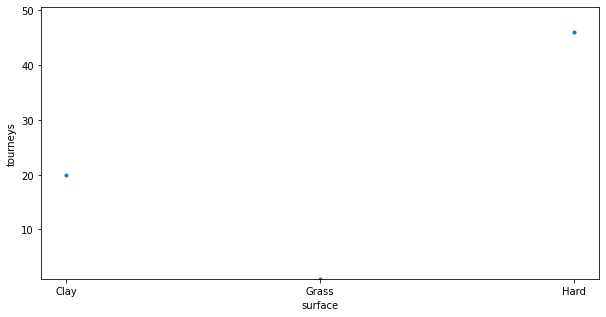

In [40]:
df_tourneys_surfaces = plot_df.groupby(['surface']).agg({'tourney_id': 'nunique'}).reset_index().rename(columns={'tourney_id': 'tourneys'})
print(df_tourneys_surfaces)
draw_rank_correlation(df_tourneys_surfaces['surface'], df_tourneys_surfaces['tourneys'], 'surface', 'tourneys', how='scatter')

  tourney_date  tourneys
0         2020        67


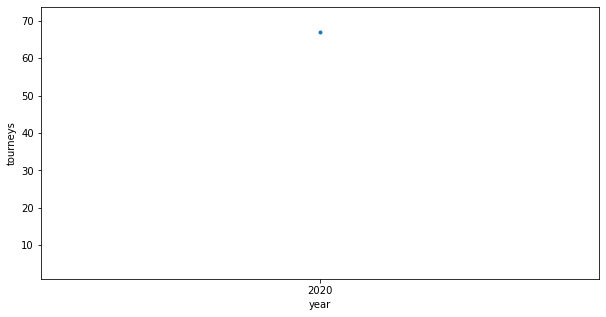

In [41]:
#data has only year 2020 so all of them were then
df_tourneys_years = plot_df.groupby(['tourney_date']).agg({'tourney_id': 'nunique'}).reset_index().rename(columns={'tourney_id': 'tourneys'})
print(df_tourneys_years)
draw_rank_correlation(df_tourneys_years['tourney_date'], df_tourneys_years['tourneys'], 'year', 'tourneys', how='plot')

  surface tourney_date  tourneys        year
0    Clay         2020        20   Clay 2020
1   Grass         2020         1  Grass 2020
2    Hard         2020        46   Hard 2020



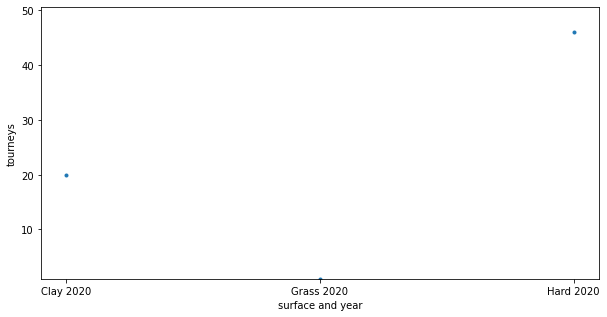

In [42]:
df_tourneys_surface = plot_df.groupby(['surface', 'tourney_date']).agg({'tourney_id': 'nunique'}).reset_index().rename(columns={'tourney_id': 'tourneys'})
df_tourneys_surface['year'] = df_tourneys_surface[['surface', 'tourney_date']].agg(' '.join, axis=1)
print(df_tourneys_surface)
print()
draw_rank_correlation(df_tourneys_surface['year'], df_tourneys_surface['tourneys'], 'surface and year', 'tourneys')

26)Kakva je distribucija broja mečeva u odnosu na podlogu i godinu održavanja?

In [43]:
plot_df = data[['tourney_id', 'tourney_name', 'surface', 'tourney_date']]
plot_df = plot_df.dropna()
#extracts the year
plot_df['tourney_date'] = plot_df.apply(lambda row: str(row['tourney_date'])[0:4], axis=1)


  surface  matches
0    Clay      414
1   Grass        2
2    Hard     1031


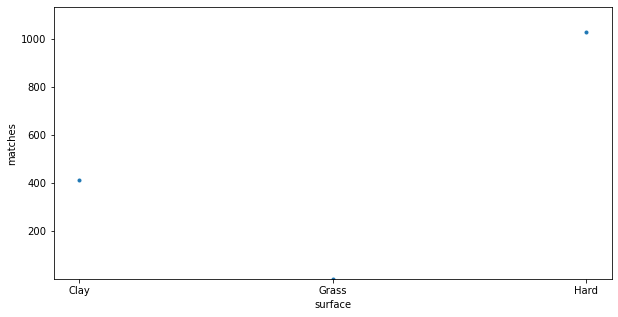

In [44]:
df_matches_surfaces = plot_df.groupby(['surface']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
print(df_matches_surfaces)
draw_rank_correlation(df_matches_surfaces['surface'], df_matches_surfaces['matches'], 'surface', 'matches', how='scatter')

  tourney_date  matches
0         2020     1447


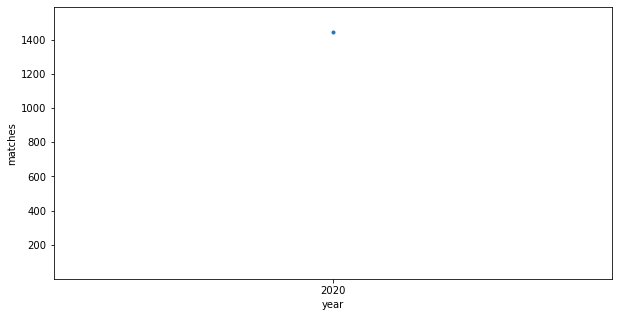

In [45]:
#data has only year 2020 so all of them were then
df_matches_years = plot_df.groupby(['tourney_date']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
print(df_matches_years)
draw_rank_correlation(df_matches_years['tourney_date'], df_matches_years['matches'], 'year', 'matches', how='plot')

  surface tourney_date  matches        year
0    Clay         2020      414   Clay 2020
1   Grass         2020        2  Grass 2020
2    Hard         2020     1031   Hard 2020



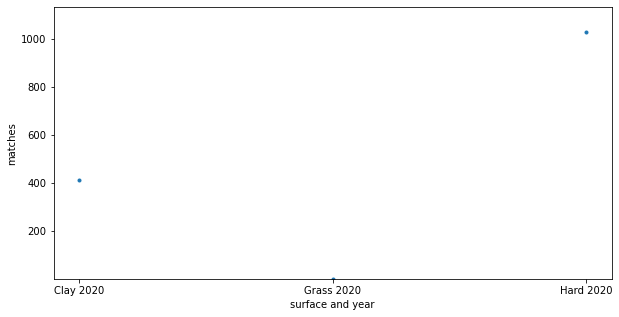

In [46]:
df_matches_surfaces = plot_df.groupby(['surface', 'tourney_date']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
df_matches_surfaces['year'] = df_matches_surfaces[['surface', 'tourney_date']].agg(' '.join, axis=1)
print(df_matches_surfaces)
print()
draw_rank_correlation(df_matches_surfaces['year'], df_matches_surfaces['matches'], 'surface and year', 'matches')